<a href="https://colab.research.google.com/github/AndreNasci/ECO904/blob/main/ECO904_06_N%C3%A3o_Supervisionado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://img-9gag-fun.9cache.com/photo/aBnj1jx_460swp.webp">

# Agrupamento (Clusterização)

## Conjunto de Dados Diversos

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt

linhas = 1000

def plotaDS(ds):
  plt.scatter(ds[0][:, 0], ds[0][:, 1], s=10, c=ds[1])
  plt.show()

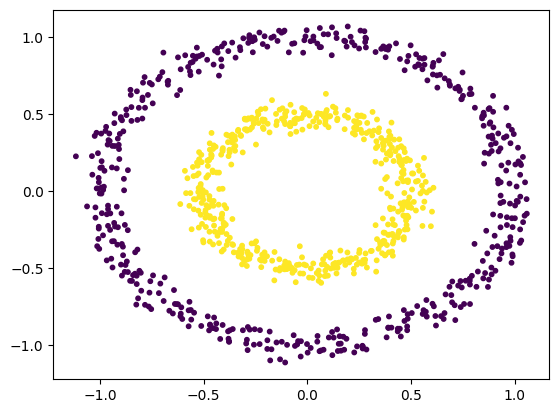

In [ ]:
# make_circles:
# Make a large circle containing a smaller circle in 2d.
# A simple toy dataset to visualize clustering and classification algorithms.
circulos = datasets.make_circles(n_samples=linhas, factor=0.5, noise=0.05, random_state=42)
plotaDS(circulos)

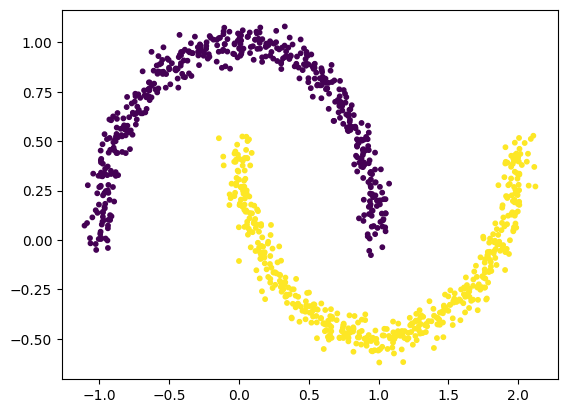

In [ ]:
# make_moons:
# Make two interleaving half circles.
luas = datasets.make_moons(n_samples=linhas, noise=0.05, random_state=42)
plotaDS(luas)

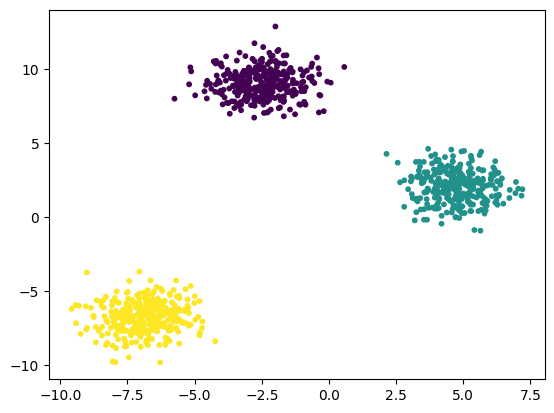

In [ ]:
# make_blobs
# Generate isotropic Gaussian blobs (bolhas) for clustering.
bolhas = datasets.make_blobs(n_samples=linhas, random_state=42)

plotaDS(bolhas)

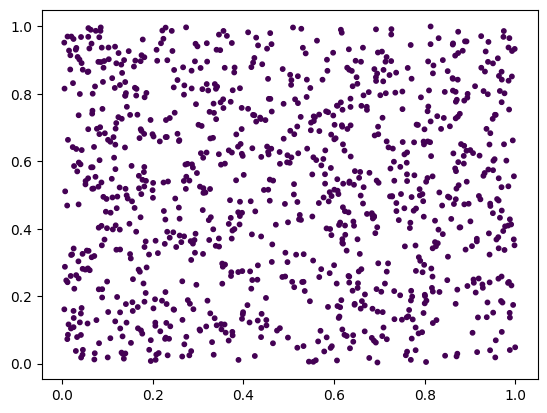

In [ ]:
import numpy as np

np.random.seed(42)
# np.random.rand = cria um vetor populado com numeros aleatórios
# de dimensões (linhas x 2)
aleatorio = np.random.rand(linhas, 2), [0] * linhas

plotaDS(aleatorio)

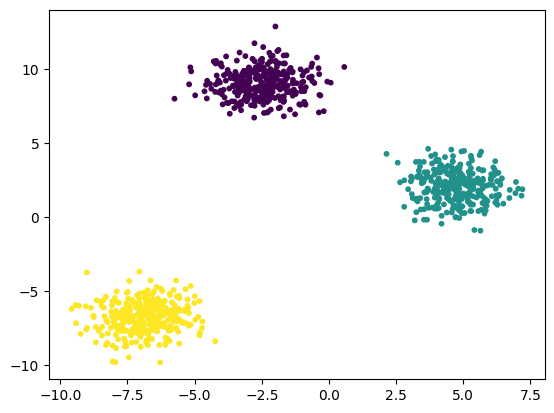

In [ ]:
X, y = datasets.make_blobs(n_samples=linhas, random_state=42)
blobs_original = (X,y)
plotaDS(blobs_original)

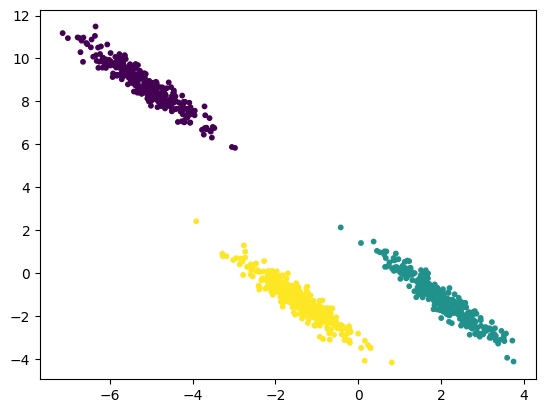

In [ ]:
transformation = [[0.6, -0.6], [-0.4, 0.8]]
# np.dot -> faz o produto vetorial de dois arrays
X_aniso = np.dot(X, transformation)
freada = (X_aniso, y)

plotaDS(freada)

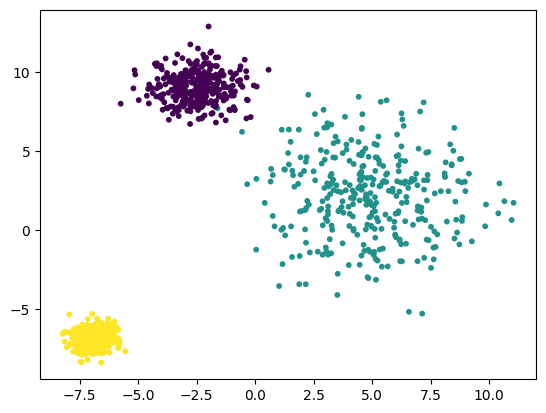

In [ ]:
variado = datasets.make_blobs(n_samples=linhas, cluster_std=[1.0, 2.5, 0.5], random_state=42)

plotaDS(variado)

## Agrupadores

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

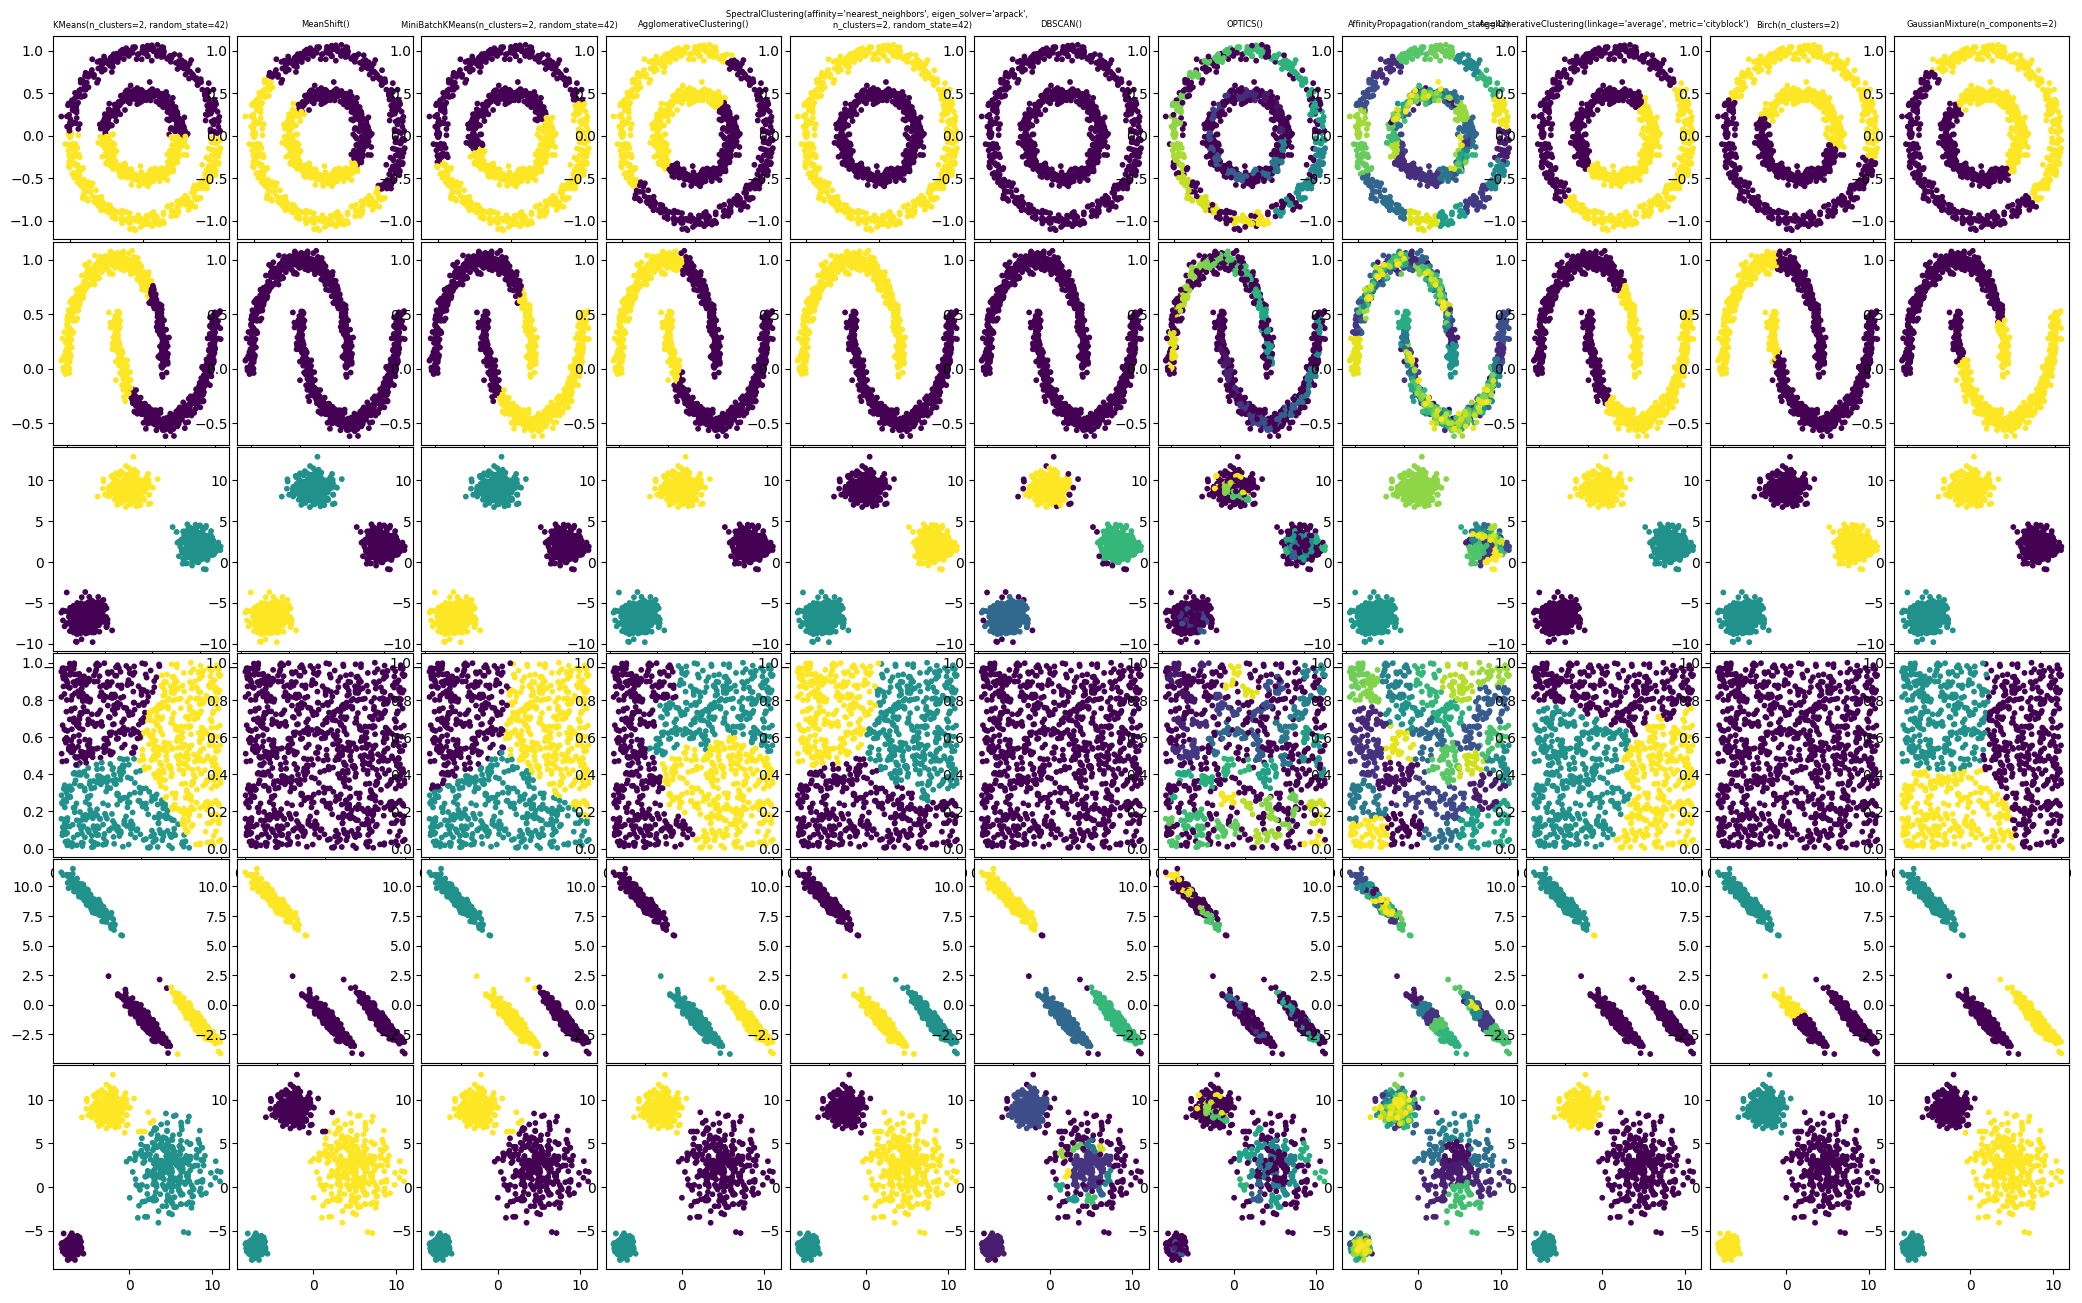

In [ ]:
from sklearn import cluster, mixture, metrics
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from tqdm.notebook import tqdm
import time
import warnings

# https://scikit-learn.org/stable/modules/clustering.html
datasets = [
    (circulos,{'n_clusters':2},'Circulos'),
    (luas,{'n_clusters':2},'Luas'),
    (bolhas,{'n_clusters':3},'Bolhas'),
    (aleatorio,{'n_clusters':3},'Aleatório'),
    (freada,{'n_clusters':3},'Freada'),
    (variado,{'n_clusters':3},'Variado'),
]

metricas = []

plot_num = 1
plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01)

for i, (dados, config, nome) in enumerate(tqdm(datasets)):

  X, y_true = dados

  agrupadores = [
      cluster.KMeans(n_clusters=config['n_clusters'], random_state=42),
      cluster.MeanShift(), # define o numero de cluster sozinho, em geral, de acordo com a densidade dos dados no espaço
      cluster.MiniBatchKMeans(n_clusters=config['n_clusters'], random_state=42), # kmeans otimizado para rodar em grupos grandes
      cluster.AgglomerativeClustering(n_clusters=config['n_clusters'], linkage='ward'), # se diferencia do kmeans 
      # pela forma como calcula distãncia entre os pontos
      cluster.SpectralClustering(n_clusters=config['n_clusters'], eigen_solver='arpack', affinity='nearest_neighbors', random_state=42),
      cluster.DBSCAN(),
      cluster.OPTICS(),
      cluster.AffinityPropagation(random_state=42),
      cluster.AgglomerativeClustering(n_clusters=config['n_clusters'], linkage='average', metric='cityblock'),
      cluster.Birch(n_clusters=config['n_clusters']),
      mixture.GaussianMixture(n_components=config['n_clusters'], covariance_type='full'), # não faz parte da biblioteca de 
      # clusterizador do kmeans, mas da biblioteca de mistura (mixture)
  ]

  for ag in tqdm(agrupadores):

    warnings.filterwarnings('ignore')

    t0 = time.time()
    ag.fit(X)
    t1 = time.time() # gambiarra pra saber o tempo de treinamento

    warnings.filterwarnings('default')

    if hasattr(ag, "labels_"): # tem técnicas que retornam automaticamente as labels dos dados
      y_pred = ag.labels_.astype(int)
    else: # tem outras que, para isso, precisamos usar o predict
      y_pred = ag.predict(X)

    if len(set(y_pred)) > 1: # se ele encontra mais de um cluster, há mais métricas
    # disponíveis para serem exploradas

      metricas.append({
        'dataset':nome,
        'algorithm':str(ag),
        'time':t1-t0,
        'mutualInfo(MI)':metrics.mutual_info_score(y_true,y_pred),
        'adjustedMI':metrics.adjusted_mutual_info_score(y_true,y_pred),
        'normalizedMI':metrics.normalized_mutual_info_score(y_true,y_pred),
        'rand(R)':metrics.rand_score(y_true,y_pred),
        'adjustedR':metrics.adjusted_rand_score(y_true,y_pred),
        'completeness':metrics.completeness_score(y_true,y_pred),
        'fowlkesMallows':metrics.fowlkes_mallows_score(y_true,y_pred),
        'homogeneity':metrics.homogeneity_score(y_true,y_pred),
        'vMeasure':metrics.v_measure_score(y_true,y_pred),
        'calinskiHarabasz':metrics.calinski_harabasz_score(X,y_pred),
        'daviesBouldin':metrics.davies_bouldin_score(X,y_pred),
        'silhouette':metrics.silhouette_score(X,y_pred),
      })

    else: # caso contrário, somente estas:
      # esta técnica só gerou um grupo (cluster)
      metricas.append({
        'dataset':nome,
        'algorithm':str(ag),
        'time':t1-t0,
      })

    plt.subplot(len(datasets), len(agrupadores), plot_num)
    if i == 0:
      plt.title(str(ag), size=6)

    plt.scatter(X[:, 0], X[:, 1], s=10, c=y_pred)
    plot_num += 1

plt.show() # mostra os clusters que cada agrupador entregou 
# os datasets usados são os datasets de demonstração do sklearn
# kmeans - trabalha com centros de massa
# algumas técnicas terão dificuldades em agrupar certos grupos de dados,
# a depender de sua distribuição no espaço
# kmeans é muito rápido e eficiente
# bloobs - agrupamentos de dados


In [ ]:
import pandas as pd

dfm = pd.DataFrame(metricas)
dfm

# métricas que não tem um tutor para orientar: calinsHarabas, daviesBouldin, silhouete
# o formato do dataset influencia na nota
# não é possível dizer se a métrica obteve um resultado bom/ruim, pois não há tutor para referência
# o que podemos dizer é que o método separou bem certos dados, o quão bem ele conseguiu separar/agrupar
# clusterização é bom para encontrar similaridades em um conjuntos de dados
# fornecer insights 


<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen imp

,dataset,algorithm,time,mutualInfo(MI),adjustedMI,normalizedMI,rand(R),adjustedR,completeness,fowlkesMallows,homogeneity,vMeasure,calinskiHarabasz,daviesBouldin,silhouette
0,Circulos,"KMeans(n_clusters=2, random_state=42)",0.550689,0.000008,-0.000712,0.000012,0.499508,-0.000985,0.000012,0.499203,0.000012,0.000012,577.819450,1.182142,0.354078
1,Circulos,MeanShift(),5.613805,0.000000,-0.000723,0.000000,0.499499,-0.001002,0.000000,0.499014,0.000000,0.000000,574.868143,1.185303,0.354075
2,Circulos,"MiniBatchKMeans(n_clusters=2, random_state=42)",0.071617,0.000000,-0.000723,0.000000,0.499499,-0.001000,0.000000,0.499399,0.000000,0.000000,567.945649,1.190213,0.349248
3,Circulos,AgglomerativeClustering(),0.049770,0.002467,0.002845,0.003567,0.501952,0.003909,0.003575,0.502970,0.003559,0.003567,547.554997,1.203792,0.344739
4,Circulos,SpectralClustering(affinity='nearest_neighbors...,0.653703,0.693147,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.001122,894.129425,0.112462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,Variado,OPTICS(),0.765230,0.502493,0.252483,0.279906,0.573728,0.016930,0.201657,0.328358,0.457389,0.279906,12.506748,1.164363,-0.254782
62,Variado,AffinityPropagation(random_state=42),3.625395,1.093929,0.148068,0.326619,0.682074,0.058298,0.195348,0.210501,0.995738,0.326619,59.313248,0.374322,0.110436
63,Variado,"AgglomerativeClustering(linkage='average', met...",0.063952,1.079575,0.982640,0.982672,0.996012,0.991018,0.982672,0.994006,0.982672,0.982672,6807.095069,0.367706,0.772044
64,Variado,Birch(),0.069918,1.086369,0.988845,0.988865,0.997337,0.994003,0.988873,0.995998,0.988857,0.988865,6992.924174,0.364652,0.775767


# Decomposição

The sklearn.decomposition module includes matrix decomposition algorithms, including among others PCA, NMF or ICA. **Most of the algorithms of this module can be regarded as dimensionality reduction techniques.**

In [ ]:
from sklearn import datasets

# esse dataset tem alguns dados sobrepostos, o que o torna ideal para 
# analisar esse tipo de modelo
X, y = datasets.load_iris(return_X_y=True)
X.shape, y.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


((150, 4), (150,))

  0%|          | 0/11 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/py

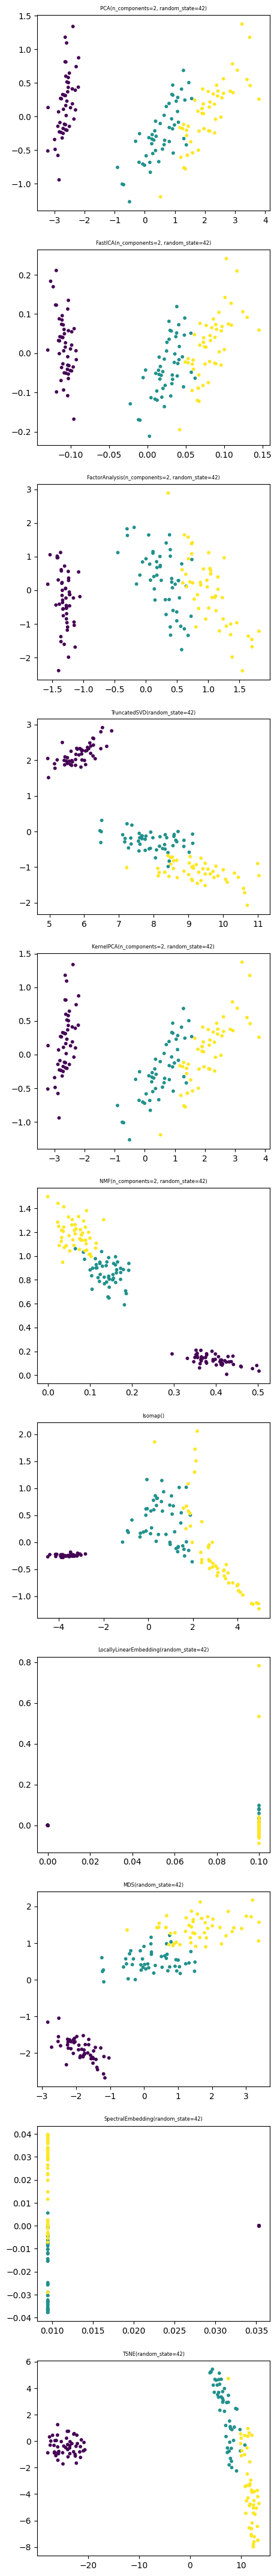

In [ ]:
# há vantagens em usar decomposição como pré-processamento
# usar a decomposição antes de qualquer técnica de aprendizado 

from sklearn import decomposition, manifold
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

# algumas técnicas de decomposição
decomp = [
    decomposition.PCA(n_components=2,random_state=42),
    decomposition.FastICA(n_components=2,random_state=42),
    decomposition.FactorAnalysis(n_components=2,random_state=42),
    #decomposition.LatentDirichletAllocation(n_components=2,random_state=42),
    decomposition.TruncatedSVD(n_components=2,random_state=42),
    decomposition.KernelPCA(n_components=2,random_state=42),
    decomposition.NMF(n_components=2,random_state=42),
    # daqui pra baixo, o n_components default é 2
    manifold.Isomap(),
    manifold.LocallyLinearEmbedding(random_state=42),
    manifold.MDS(random_state=42),
    manifold.SpectralEmbedding(random_state=42),
    manifold.TSNE(random_state=42),
]

# agrup: fit e predict ou fit_predict()
# decomp: fit e transform ou fit_transform()

plt.figure(figsize=(5, 5 * len(decomp)))
plt.subplots_adjust()

for id, dc in enumerate(tqdm(decomp)):
  Xd = dc.fit_transform(X)

  plt.subplot(len(decomp), 1, id+1)
  plt.title(str(dc), size=6)

  plt.scatter(Xd[:, 0], Xd[:, 1], s=10, c=y)

plt.show()

# Detecção de Anomalias

https://scikit-learn.org/stable/modules/outlier_detection.html

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen imp

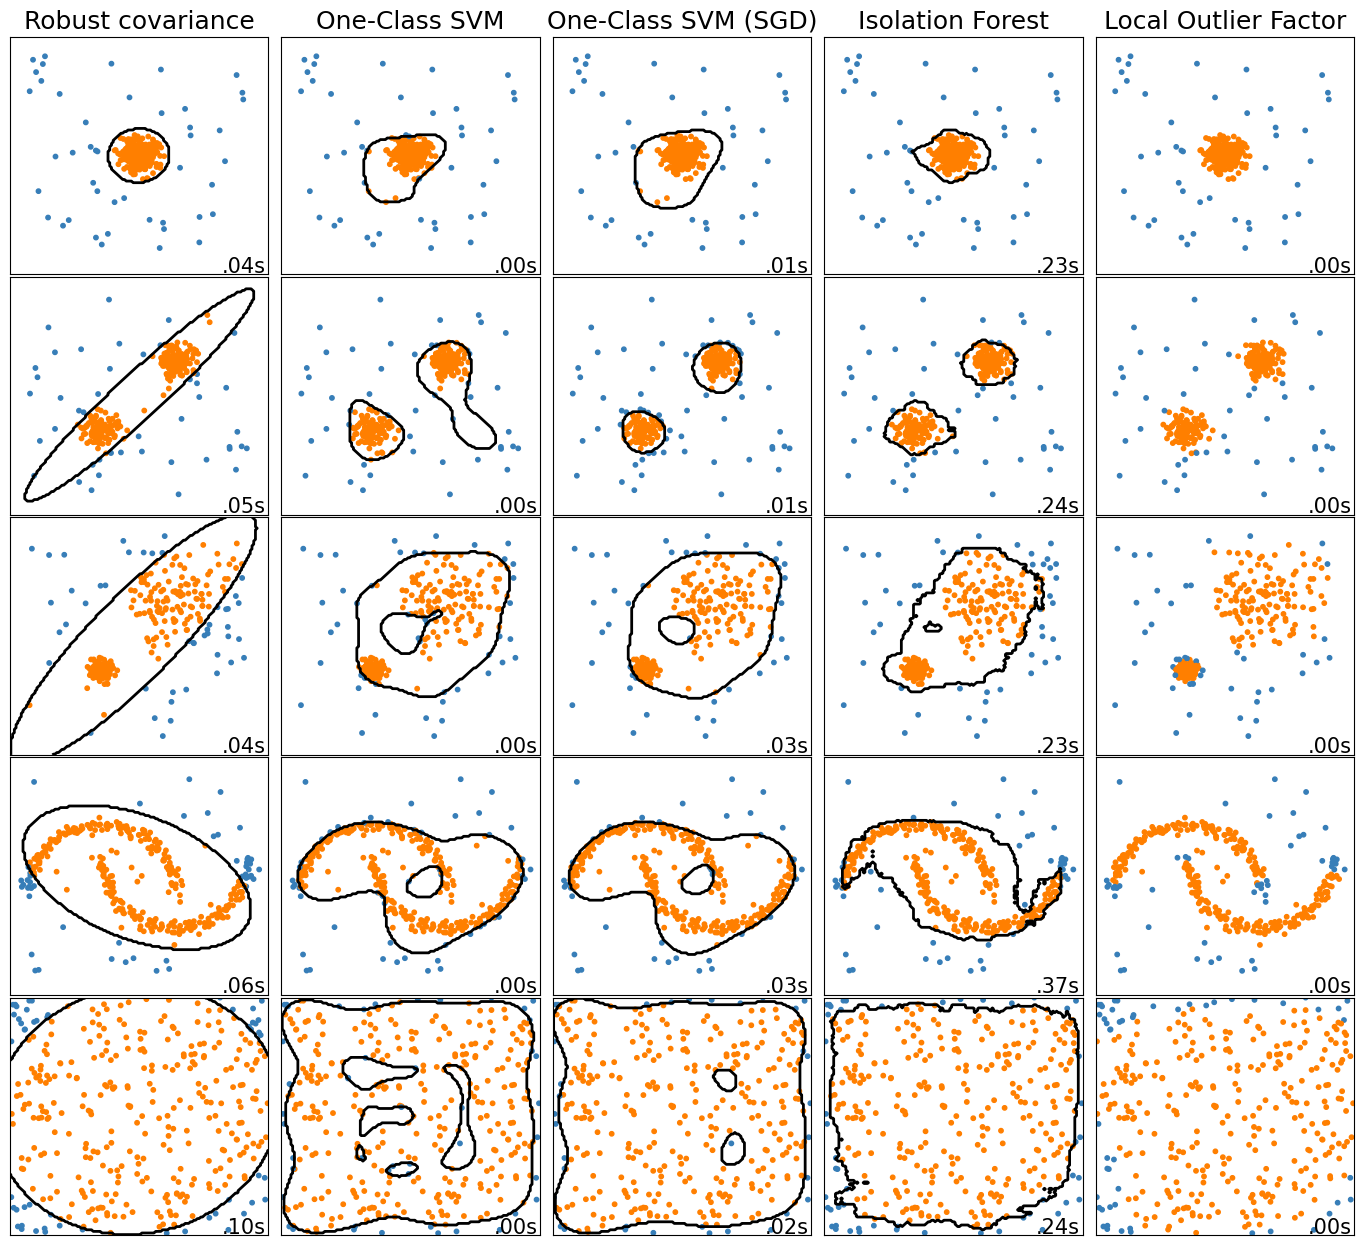

In [ ]:
import time

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.datasets import make_moons, make_blobs
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.linear_model import SGDOneClassSVM
from sklearn.kernel_approximation import Nystroem
from sklearn.pipeline import make_pipeline

matplotlib.rcParams["contour.negative_linestyle"] = "solid"

# Example settings
n_samples = 300
outliers_fraction = 0.15 # o quanto de contaminação há no dataset
# mude esse valor e veja a diferença nos gráficos abaixo
# 15% do dataset você consegue analizar, então 
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers

# define outlier/anomaly detection methods to be compared.
# the SGDOneClassSVM must be used in a pipeline with a kernel approximation
# to give similar results to the OneClassSVM
# todas as técnicas são agrupamentos de densisdade
anomaly_algorithms = [
    (
        "Robust covariance",
        EllipticEnvelope(contamination=outliers_fraction, random_state=42),
    ),
    ("One-Class SVM", svm.OneClassSVM(nu=outliers_fraction, kernel="rbf", gamma=0.1)),
    (
        "One-Class SVM (SGD)",
        make_pipeline(
            Nystroem(gamma=0.1, random_state=42, n_components=150),
            SGDOneClassSVM(
                nu=outliers_fraction,
                shuffle=True,
                fit_intercept=True,
                random_state=42,
                tol=1e-6,
            ),
        ),
    ),
    (
        "Isolation Forest",
        IsolationForest(contamination=outliers_fraction, random_state=42),
    ),
    (
        "Local Outlier Factor",
        LocalOutlierFactor(n_neighbors=35, contamination=outliers_fraction),
    ),
]

# Define datasets
blobs_params = dict(random_state=0, n_samples=n_inliers, n_features=2)
datasets = [
    make_blobs(centers=[[0, 0], [0, 0]], cluster_std=0.5, **blobs_params)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[0.5, 0.5], **blobs_params)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[1.5, 0.3], **blobs_params)[0],
    4.0
    * (
        make_moons(n_samples=n_samples, noise=0.05, random_state=0)[0]
        - np.array([0.5, 0.25])
    ),
    14.0 * (np.random.RandomState(42).rand(n_samples, 2) - 0.5),
]

# Compare given classifiers under given settings
xx, yy = np.meshgrid(np.linspace(-7, 7, 150), np.linspace(-7, 7, 150))

plt.figure(figsize=(len(anomaly_algorithms) * 2 + 4, 12.5))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.96, wspace=0.05, hspace=0.01
)

plot_num = 1
rng = np.random.RandomState(42)

for i_dataset, X in enumerate(datasets):
    # Add outliers
    X = np.concatenate([X, rng.uniform(low=-6, high=6, size=(n_outliers, 2))], axis=0)

    for name, algorithm in anomaly_algorithms:
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        plt.subplot(len(datasets), len(anomaly_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        # fit the data and tag outliers
        if name == "Local Outlier Factor":
            y_pred = algorithm.fit_predict(X)
        else:
            y_pred = algorithm.fit(X).predict(X)

        # plot the levels lines and the points
        if name != "Local Outlier Factor":  # LOF does not implement predict
            Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="black")

        colors = np.array(["#377eb8", "#ff7f00"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[(y_pred + 1) // 2])

        plt.xlim(-7, 7)
        plt.ylim(-7, 7)
        plt.xticks(())
        plt.yticks(())
        plt.text(
            0.99,
            0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=15,
            horizontalalignment="right",
        )
        plot_num += 1

plt.show()

Atividade: escolher um dos dois datasets e fazer a clusterização dele. converter dados de entrada, usar os agrupamentos mostrados em sala. 
Veja se muda o comportamento usando um dempositor antes do agrupamento. 
